In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

# Feature Importance

The importance of a given feature to a model can be assessed by shuffling its values, destroying any information contained within, and measuring how much act has impacted the model's performance. 

We can then compare a model trained on the shuffled matrix with the same model trained on the original matrix. The loss of performance will measure how important a given feature is to the model.

Scikit-learn's `permutation_importance` class shuffles a feature and measures the impact of such shuffling on the scoring of the model. **This only measures the importance of the feature to the model, not the importance of the feature in itself.**

***
## Load the data

In [2]:
# Read Data from CSV (NEW DATA, NOT SCALED)
df = pd.read_csv("../data/abnormal_writeout_noscale.data.csv", index_col=0)

# trascurare da ACC a UVM
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)

# trascurare alcune colonne
df.drop("TTT_freq", axis=1, inplace=True)
df.drop("oldest_phylostratum_factor", axis=1, inplace=True)

# Drop NaNs
df.dropna(inplace=True)

# Sort features
resp = df["response"]
occ = df["occ_total_sum"]
age = df["oldest_phylostratum"]
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

# Collect Features and Labels
features_df = pd.DataFrame()
features_df["occ_total_sum"] = occ
features_df["oldest_phylostratum"] = age
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head(10)

occ_total_sum  oldest_phylostratum  cds_length    gc_cds  \
1                     33                 12.0        1488  0.657258   
10                    28                  1.0         873  0.422680   
100                   36                  1.0        1092  0.572344   
1000                 126                  1.0        2800  0.460000   
10000                 55                  1.0        1484  0.401617   
100009676              0                 15.0         267  0.670412   
10001                 14                  2.0        1153  0.416305   
10003                 99                  1.0        2706  0.396896   
100037417              3                  1.0         405  0.614815   
10004                 49                  1.0        2250  0.607556   

           dnase_gene  dnase_cds  H3k4me1_gene  H3k4me3_gene  H3k27ac_gene  \
1            0.612230   0.758065      0.561429      1.000000      0.216855   
10           0.086769   0.195876      0.657839      0.000000      0.000000   
100          0.479295   0.611722      0.851369      0.354628      0.618954   
1000         0.171524   0.280357      0.554023      0.052420      0.278492   
10000        0.143843   0.030997      0.400789      0.106455      0.457949   
100009676    0.648707   0.891386      1.000000      1.000000      1.000000   
10001        0.120222   0.306158      0.173180      0.231617      1.000000   
10003        0.071271   0.209904      0.052603      0.038094      0.005366   
100037417    0.330596   0.298765      0.351564      0.056264      0.028482   
10004        0.482872   0.707556      1.000000      0.391545      0.147303   

           H3k4me1_cds  H3k4me3_cds  H3k27ac_cds  lamin_gene  repli_gene  \
1             0.661290     1.000000     0.198925         0.0    0.041809   
10            0.000000     0.000000     0.000000         1.0   -0.007148   
100           0.754579     0.030220     0.086996         0.0    0.040463   
1000          0.270357     0.021429     0.151429         0.0   -0.022495   
10000         0.708221     0.030997     0.659704         0.0   -0.000387   
100009676     1.000000     1.000000     1.000000         0.0    0.029824   
10001         0.019081     0.157849     1.000000         1.0    0.038151   
10003         0.105322     0.071693     0.030303         1.0   -0.016515   
100037417     0.298765     0.000000     0.000000         0.0    0.049459   
10004         1.000000     0.454667     0.211111         0.0    0.048559   

           nsome_gene  nsome_cds  transcription_gene  repeat_gene  repeat_cds  \
1            0.809254   0.706453            6.798234     0.040516         0.0   
10           0.828752   1.097018            0.061963     0.002809         0.0   
100          1.249600   1.354306            6.081620     0.028404         0.0   
1000         0.921420   1.382249            2.254471     0.014520         0.0   
10000        0.960747   1.196871            1.080241     0.009545         0.0   
100009676    0.549569   0.148308           18.763257     0.000000         0.0   
10001        0.848328   1.028834           12.872106     0.006818         0.0   
10003        0.664585   0.914735            0.328743     0.033453         0.0   
100037417    0.785799   0.368035           57.925186     0.011008         0.0   
10004        1.106100   1.052286            2.206688     0.002915         0.0   

           recomb_gene  AAA_freq  AAC_freq  AAG_freq  AAT_freq  ACA_freq  \
1             0.000000  0.004755  0.008152  0.007473  0.002717  0.011549   
10            2.043350  0.025258  0.019518  0.021814  0.024110  0.025258   
100           0.868383  0.018727  0.012172  0.023408  0.003745  0.017790   
1000          1.143060  0.022054  0.014823  0.022415  0.024946  0.022054   
10000         4.217000  0.039835  0.015797  0.030220  0.025412  0.024038   
100009676     0.878711  0.000000  0.003774  0.003774  0.003774  0.007547   
10001         0.877603  0.035430  0.016829  0.035430  0.008857  0.016829   
10003         0.434130  0.036439 

## Custom PCA

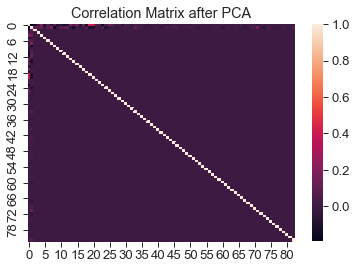

83 total features.
Confounder columns start from index 2 of feature matrix.
Non-counfounders: ['occ_total_sum', 'oldest_phylostratum']


occ_total_sum  oldest_phylostratum  cds_length    gc_cds  dnase_gene  \
1                 33                 12.0        1488  0.657258    0.612230   
10                28                  1.0         873  0.422680    0.086769   
100               36                  1.0        1092  0.572344    0.479295   
1000             126                  1.0        2800  0.460000    0.171524   
10000             55                  1.0        1484  0.401617    0.143843   
...              ...                  ...         ...       ...         ...   
999              208                  1.0        2649  0.514911    0.313496   
9990              88                  1.0        4035  0.486245    0.159518   
9991              37                  2.0        2043  0.443465    0.164623   
9992              14                 12.0         372  0.462366    0.166620   
9993              53                  6.0        1994  0.620863    0.362039   

       dnase_cds  H3k4me1_gene  H3k4me3_gene  H3k27ac_gene  H3k4me1_cds  \
1       0.758065      0.561429      1.000000      0.216855     0.661290   
10      0.195876      0.657839      0.000000      0.000000     0.000000   
100     0.611722      0.851369      0.354628      0.618954     0.754579   
1000    0.280357      0.554023      0.052420      0.278492     0.270357   
10000   0.030997      0.400789      0.106455      0.457949     0.708221   
...          ...           ...           ...           ...          ...   
999     0.427709      0.721323      0.380132      0.560000     0.371461   
9990    0.305328      0.618466      1.000000      0.379258     0.538290   
9991    0.025453      0.748995      0.710461      0.872609     0.785120   
9992    0.572581      0.857123      0.861899      1.000000     1.000000   
9993    0.633400      1.000000      0.789180      0.721653     1.000000   

       H3k4me3_cds  H3k27ac_cds  lamin_gene  repli_gene  nsome_gene  \
1         1.000000     0.198925         0.0    0.041809    0.809254   
10        0.000000     0.000000         1.0   -0.007148    0.828752   
100       0.030220     0.086996         0.0    0.040463    1.249600   
1000      0.021429     0.151429         0.0   -0.022495    0.921420   
10000     0.030997     0.659704         0.0   -0.000387    0.960747   
...            ...          ...         ...         ...         ...   
999       0.147603     0.375613         0.0    0.051321    1.156640   
9990      1.000000     0.578686         0.0    0.032907    0.952004   
9991      0.786099     1.000000         0.0    0.045040    0.865913   
9992      1.000000     1.000000         0.0    0.017871    1.277585   
9993      0.266800     0.511535         0.0    0.047280    2.501995   

       nsome_cds  transcription_gene  repeat_gene  repeat_cds  recomb_gene  \
1       0.706453            6.798234     0.040516         0.0     0.000000   
10      1.097018            0.061963     0.002809         0.0     2.043350   
100     1.354306            6.081620     0.028404         0.0     0.868383   
1000    1.382249            2.254471     0.014520         0.0     1.143060   
10000   1.196871            1.080241     0.009545         0.0     4.217000   
...          ...                 ...          ...         ...          ...   
999     1.677763           12.624956     0.019776         0.0     0.549588   
9990    1.596068            4.338614     0.013269         0.0     2.271970   
9991    1.245576            7.591840     0.014049         0.0     2.458350   
9992    1.767925            0.136402     0.020090         0.0     2.001840   
9993    2.685192           11.936696     0.027329         0.0     2.421960   

       AAA_freq  AAC_freq  AAG_freq  AAT_freq  ACA_freq  ACC_freq  ACG_freq  \
1      0.004755  0.008152  0.007473  0.002717  0.011549  0.026495  0.010870   
10     0.025258  0.019518  0.021814  0.024110  0.025258  0.018370  0.003444   
100    0.018727  0.012172  0.023408  0.003745  0.017790  0.024345  0.007491   
1000   0.022054  0.014823  0.022415  0.024946  0.02

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Columns of confounder variables (highly colinear)
conf_index = 2
conf_cols = np.arange(2, X.shape[1])


class ConfounderPCA(BaseEstimator, TransformerMixin):
    """ 
    Custom PCA transformer for this dataset.
    Applies PCA only to the many collinear confounder 
    variables.
    
    cols - columns to which PCA will be applied.
    
    n_components - same as with the "vanilla" PCA. 
        If 0 < n_components < 1, select the number of 
        components such that the amount of variance that 
        needs to be explained is greater than the 
        percentage specified by n_components.
        
    apply_PCA - if false, simply returns the untransformed data.
    """

    def __init__(self, cols, n_components=None, apply_PCA=True):
        self.n_components = n_components
        self.apply_PCA = apply_PCA
        self.cols = cols
        if self.apply_PCA:
            self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        if self.apply_PCA:
            self.pca.fit(X[:, self.cols])
        return self

    def transform(self, X, y=None):
        if self.apply_PCA:
            X_pca = self.pca.transform(X[:, self.cols])
            return np.c_[X[:, :2], X_pca]
        else:
            return X


sns.heatmap(
    pd.DataFrame(
        ConfounderPCA(cols=np.arange(2, X.shape[1])).fit_transform(StandardScaler().fit_transform(X))
    ).corr()
)
plt.title("Correlation Matrix after PCA")
plt.show()

print(X.shape[1], "total features.")
print("Confounder columns start from index", conf_index, "of feature matrix.")
print("Non-counfounders:", features_df.iloc[:, 0:conf_index].columns.tolist())

features_df

## Custom Scoring (not used in this notebook)

In [4]:
from sklearn.metrics import auc, make_scorer, precision_recall_curve


def auprc(y_true, y_scores, **kwargs):
    """ Remember to use make_scorer(auprc, needs_proba=True,) """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    # result is sum of the areas under each curve
    return auc(thresholds, precisions[:-1]) + auc(thresholds, recalls[:-1])

## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (14536, 83) (14536,)
Testing set shape: (3634, 83) (3634,)


# Calculating Feature Importance by Coefficients

The importance of a given feature to a logistic regressor can be assessed by finding the largest coefficients of its variables (as long as the features are scaled).

If we apply our PCA, the coefficients will correspond to the sum of mutations variable, the age variable, and the principal components.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", ConfounderPCA(n_components=0.95, cols=np.arange(2, X.shape[1]))),
    ("lr", LogisticRegression(max_iter=2000,)),
])

lr_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ConfounderPCA(cols=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
                               n_components=0.95)),
                ('lr', LogisticRegression(max_iter=2000))])

### Collect the coefficients of the logistic regressor into a dataframe


In [17]:
# Collect the coefficients into a pandas dataframe
imp_df = pd.DataFrame(lr_clf["lr"].coef_.T, columns=["Score"])
imp_df.rename(index={0 : "occ_total_sum", 1 : "oldest_phylostratum"}, inplace=True)

# Subtract 2 from the remaining numeric instances
imp_df.rename(index=lambda s: s-2 if isinstance(s, int) else s, inplace=True)
imp_df.rename(index=lambda s: f"PC {s}" if isinstance(s, int) else s, inplace=True)

# Print the dataframe sorted by absolute value of coefficients
imp_df.sort_values(by="Score", key=abs, ascending=False).head(5)

Score
occ_total_sum        0.362840
oldest_phylostratum -0.273072
PC 8                -0.169176
PC 23                0.130024
PC 28               -0.124039

### What are the loadings of the principal components?

In [23]:
# collect the loadings of the pca object into a pandas dataframe
loadings_df = pd.DataFrame(lr_clf["pca"].pca.components_.T, index = features_df.columns[2:])
loadings_df.rename(columns=lambda s: f"PC {s}", inplace=True)

# Get the indices of the top principal components
idx = imp_df.sort_values(by="Score", key=abs, ascending=False)[2:].index

# Print the loadings with columns (components) sorted by absolute value of their coefficient
loadings_df.loc[:, idx].T

cds_length    gc_cds  dnase_gene  dnase_cds  H3k4me1_gene  \
PC 8    -0.027817 -0.011887    0.053443   0.030444     -0.000699   
PC 23    0.279352 -0.013013    0.030815   0.048191      0.149851   
PC 28   -0.019653  0.002810   -0.022794  -0.098304      0.022418   
PC 39    0.044793  0.007928   -0.107434  -0.024546     -0.000966   
PC 14   -0.157570  0.000130   -0.006657  -0.038132     -0.063960   
PC 11    0.227201 -0.001629   -0.061881  -0.081109      0.010440   
PC 3    -0.014442 -0.031576    0.096134   0.050794      0.318623   
PC 21   -0.211454 -0.005017    0.015286   0.002314     -0.104751   
PC 45    0.023641  0.015188   -0.009699   0.066177     -0.020171   
PC 2     0.101713  0.014622   -0.107300  -0.070733     -0.177604   
PC 12    0.126284  0.001908   -0.011421  -0.030721      0.020233   
PC 44   -0.000439  0.001222   -0.007166  -0.087197      0.009804   
PC 5     0.007378 -0.003788   -0.002547  -0.018892      0.046635   
PC 32   -0.003211  0.002726   -0.069817   0.020812      0.000829   
PC 38   -0.014167 -0.001199    0.120032   0.158434      0.014472   
PC 35    0.021598  0.006099   -0.034080  -0.125030      0.033920   
PC 18    0.481241  0.020278    0.117917   0.124511     -0.118137   
PC 24    0.083257 -0.007512    0.110196   0.129848      0.357476   
PC 16   -0.265716  0.017279   -0.029579   0.010231      0.021402   
PC 15    0.244686 -0.003876   -0.080848  -0.101869      0.033596   
PC 7    -0.052257  0.007797    0.020952   0.011858      0.003179   
PC 20   -0.000383 -0.003011   -0.024463   0.029658      0.002480   
PC 41    0.038000 -0.005504    0.016526  -0.004703      0.016084   
PC 46   -0.000253  0.019716   -0.004253  -0.005184     -0.000892   
PC 13    0.118020  0.000440   -0.063408  -0.050997     -0.001834   
PC 33    0.030781 -0.006674   -0.027328  -0.112173     -0.030344   
PC 34   -0.023664 -0.025956    0.206269   0.256310     -0.052149   
PC 37    0.039622 -0.025308   -0.109576  -0.109466      0.029145   
PC 4     0.053863 -0.007626    0.055140   0.043554      0.098158   
PC 29    0.005814  0.022194   -0.238745  -0.352001      0.030865   
PC 0    -0.017336  0.196377    0.148127   0.142863      0.075836   
PC 6     0.039567 -0.006017   -0.002122  -0.018652      0.014555   
PC 26   -0.045257  0.042193    0.076658   0.088526     -0.081457   
PC 9    -0.125405 -0.027143    0.001960  -0.015874      0.009605   
PC 22    0.073851 -0.008327   -0.055254  -0.119070     -0.042488   
PC 43    0.013524 -0.026235    0.010331  -0.052444      0.002927   
PC 1    -0.013113  0.010126   -0.047063  -0.041974     -0.093957   
PC 40   -0.016709  0.018307    0.003689  -0.035332      0.026013   
PC 25    0.034003 -0.001468   -0.008851   0.044989     -0.268990   
PC 31    0.053588 -0.041339    0.366648   0.387011     -0.060351   
PC 36   -0.006891  0.025251   -0.029897  -0.020201      0.007227   
PC 19    0.049029  0.006962    0.036023   0.076485      0.017039   
PC 27    0.105613 -0.011596    0.112210   0.181287     -0.150152   
PC 10   -0.205224 -0.003029    0.035531  -0.065537      0.022800   
PC 30   -0.016863  0.006067    0.092262   0.139861     -0.017874   
PC 42   -0.034268 -0.028911   -0.012874   0.011903     -0.006134   
PC 17    0.534591  0.011321   -0.062562  -0.088124     -0.004830   

       H3k4me3_gene  H3k27ac_gene  H3k4me1_cds  H3k4me3_cds  H3k27ac_cds  \
PC 8       0.135068      0.013380    -0.011887     0.134773     0.000002   
PC 23      0.042371     -0.222585     0.192872     0.069241    -0.214496   
PC 28      0.028693     -0.024512     0.017757     0.024018    -0.038538   
PC 39     -0.003269     -0.035078     0.045087     0.048287    -0.009311   
PC 14      0.021164     -0.082891    -0.076897     0.003402    -0.088949   
PC 11     -0.068011      0.077859    -0.002383    -0.098610     0.073775   
PC 3       0.243493      0.331582     0.300218     0.196296     0.320514   
PC 21     -0.166516      0.199809    -0.139824    -0.185364     0.210632   
PC 45      0.003402      0.003335    -0.003971     0.02724

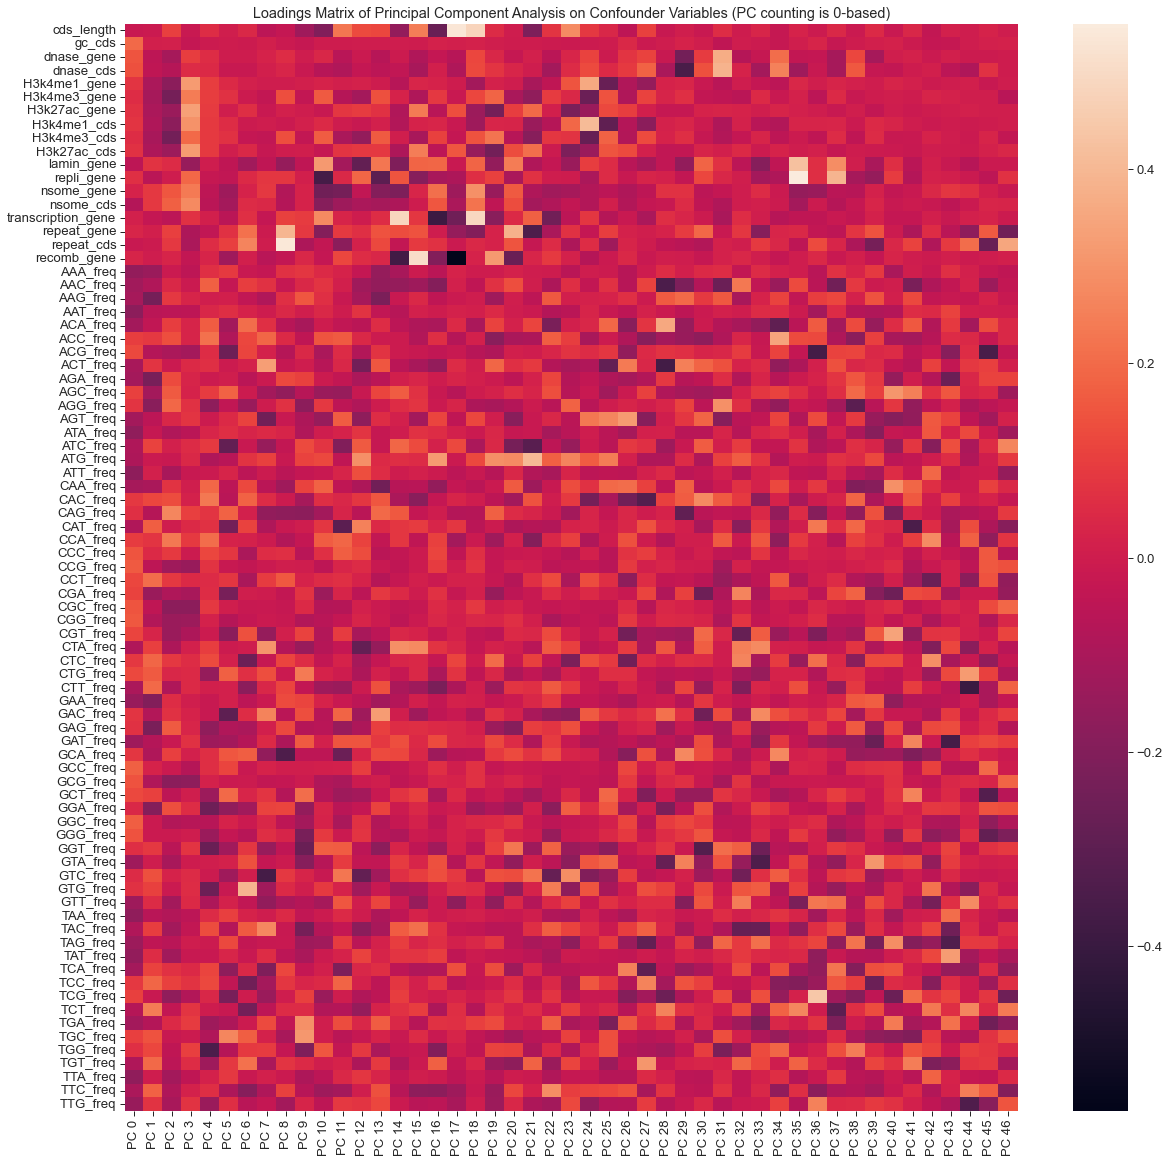

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(loadings_df)
plt.title("Loadings Matrix of Principal Component Analysis on Confounder Variables (PC counting is 0-based)")
plt.show()

# Feature importance by Permutation

In [29]:
from sklearn.inspection import permutation_importance

def calc_importances(model, x, y, ranseed=0):
    
    # Train the model on the dataset
    model.fit(x, y) 
    
    # Compare the model against other models trained on permutations of the dataset
    results = permutation_importance(model, x, y, n_repeats=10, random_state=ranseed, scoring='roc_auc', n_jobs=-1)
    
    return pd.DataFrame(results.importances_mean, columns=["Score"], index=features_df.columns)

### PCA, Dropping Components to 95% Explained Variance

In [30]:
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", ConfounderPCA(cols=np.arange(2, X.shape[1]), n_components=0.95)),
    ("lr", LogisticRegression(max_iter=2000,)),
])

imp_pca_df = calc_importances(lr_clf, X_train, y_train, ranseed=42) 

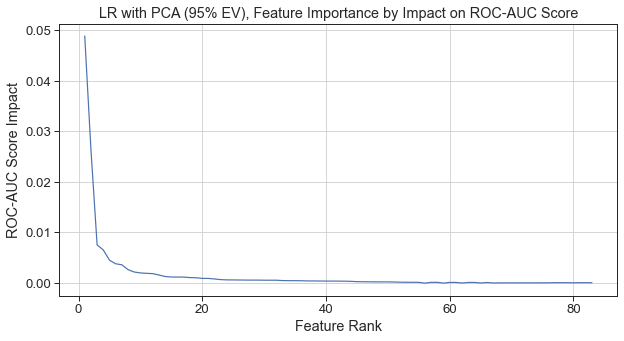

Score
occ_total_sum        0.048791
oldest_phylostratum  0.026373
cds_length           0.007490
repeat_cds           0.006480
TTG_freq             0.004462
TGG_freq             0.003753
GTA_freq             0.003550
TAC_freq             0.002585
TCT_freq             0.002121
CTC_freq             0.001942

In [32]:
data = imp_pca_df.sort_values(by="Score", key=abs, ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=np.arange(1, 84), y=data.to_numpy().flatten())
plt.title("LR with PCA (95% EV), Feature Importance by Impact on ROC-AUC Score")
plt.ylabel("ROC-AUC Score Impact")
plt.xlabel("Feature Rank")
plt.show()

# Print the feature matrix sorted by importance
data.head(10)

### Without PCA

In [33]:
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    # ("pca", ConfounderPCA()),
    ("lr", LogisticRegression(max_iter=2000,)),
])

imp_npca_df = calc_importances(lr_clf, X_train, y_train, ranseed=12) 

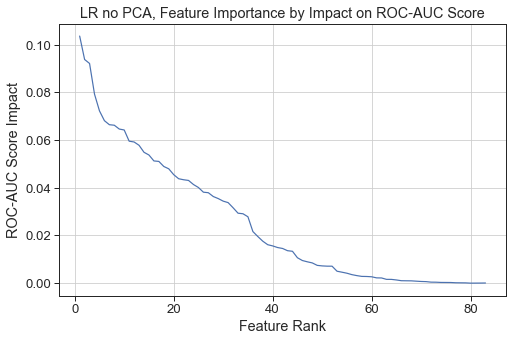

Score
TGT_freq  0.103585
gc_cds    0.093749
GTG_freq  0.092085
TAT_freq  0.079219
ATA_freq  0.072213
AGT_freq  0.068095
AGG_freq  0.066402
AGA_freq  0.066184
TGC_freq  0.064585
CGG_freq  0.064191

In [34]:
data = imp_npca_df.sort_values(by="Score", key=abs, ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=np.arange(1, 84), y=data.to_numpy().flatten())
plt.title("LR no PCA, Feature Importance by Impact on ROC-AUC Score")
plt.ylabel("ROC-AUC Score Impact")
plt.xlabel("Feature Rank")
plt.show()

# Print the feature matrix sorted by importance
data.head(10)

### Without dropping components

In [35]:
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", ConfounderPCA(cols=np.arange(2, X.shape[1]), n_components=None)),
    ("lr", LogisticRegression(max_iter=2000,)),
])

imp_pca_all_df = calc_importances(lr_clf, X_train, y_train, ranseed=12) 

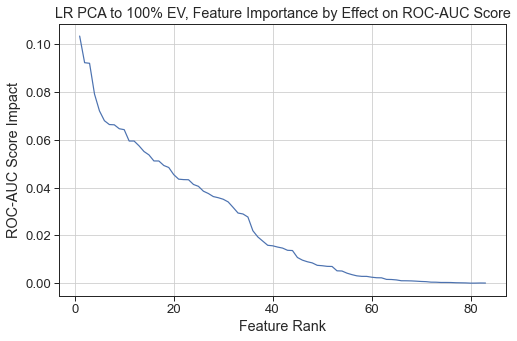

Score
TGT_freq  0.103439
gc_cds    0.092282
GTG_freq  0.092032
TAT_freq  0.079130
ATA_freq  0.072093
AGT_freq  0.067989
AGG_freq  0.066376
AGA_freq  0.066267
TGC_freq  0.064624
CGG_freq  0.064238

In [36]:
data = imp_pca_all_df.sort_values(by="Score", key=abs, ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=np.arange(1, 84), y=data.to_numpy().flatten())
plt.title("LR PCA to 100% EV, Feature Importance by Effect on ROC-AUC Score")
plt.ylabel("ROC-AUC Score Impact")
plt.xlabel("Feature Rank")
plt.show()

# Print the feature matrix sorted by importance
data.head(10)

# Summary of Results

In [37]:
results_df = pd.DataFrame()

results_df["Top Variables PCA 95%"] = imp_pca_df.sort_values(by="Score", key=abs, ascending=False).index
results_df["Scores PCA 95%"] = imp_pca_df.sort_values(by="Score", key=abs, ascending=False).Score.to_numpy()

results_df["Top Variables PCA 100%"] = imp_pca_all_df.sort_values(by="Score", key=abs, ascending=False).index
results_df["Scores PCA 100%"] = imp_pca_all_df.sort_values(by="Score", key=abs, ascending=False).Score.to_numpy()

results_df["Top Variables No PCA"] = imp_npca_df.sort_values(by="Score", key=abs, ascending=False).index
results_df["Scores No PCA"] = imp_npca_df.sort_values(by="Score", key=abs, ascending=False).Score.to_numpy()

results_df.head(10)

Top Variables PCA 95%  Scores PCA 95% Top Variables PCA 100%  \
0         occ_total_sum        0.048791               TGT_freq   
1   oldest_phylostratum        0.026373                 gc_cds   
2            cds_length        0.007490               GTG_freq   
3            repeat_cds        0.006480               TAT_freq   
4              TTG_freq        0.004462               ATA_freq   
5              TGG_freq        0.003753               AGT_freq   
6              GTA_freq        0.003550               AGG_freq   
7              TAC_freq        0.002585               AGA_freq   
8              TCT_freq        0.002121               TGC_freq   
9              CTC_freq        0.001942               CGG_freq   

   Scores PCA 100% Top Variables No PCA  Scores No PCA  
0         0.103439             TGT_freq       0.103585  
1         0.092282               gc_cds       0.093749  
2         0.092032             GTG_freq       0.092085  
3         0.079130             TAT_freq       0.079219  
4         0.072093             ATA_freq       0.072213  
5         0.067989             AGT_freq       0.068095  
6         0.066376             AGG_freq       0.066402  
7         0.066267             AGA_freq       0.066184  
8         0.064624             TGC_freq       0.064585  
9         0.064238             CGG_freq       0.064191

In [38]:
pd.set_option("display.max_rows", 83)
results_df.to_markdown("./LR_FI.md")

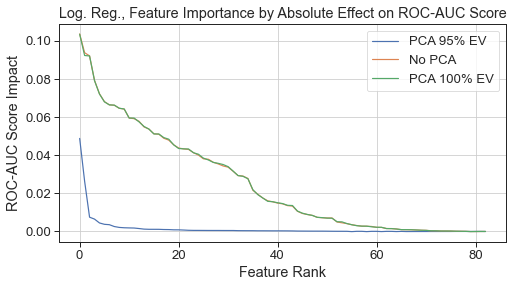

In [39]:
plt.figure(figsize=(8,4))

sns.lineplot(x=np.arange(83), y=results_df["Scores PCA 95%"].to_numpy().flatten(), label="PCA 95% EV")
sns.lineplot(x=np.arange(83), y=results_df["Scores No PCA"].to_numpy().flatten(), label="No PCA") 
sns.lineplot(x=np.arange(83), y=results_df["Scores PCA 100%"].to_numpy().flatten(), label="PCA 100% EV") 
plt.title("Log. Reg., Feature Importance by Absolute Effect on ROC-AUC Score")
plt.ylabel("ROC-AUC Score Impact")
plt.xlabel("Feature Rank")
plt.grid(True)
plt.savefig("./figures/LR_FI.png")
plt.show()

**Figure: Permutation importance scores of logistic regressor.** 

# Why is the the PCA to 100% Explained Variance so different?

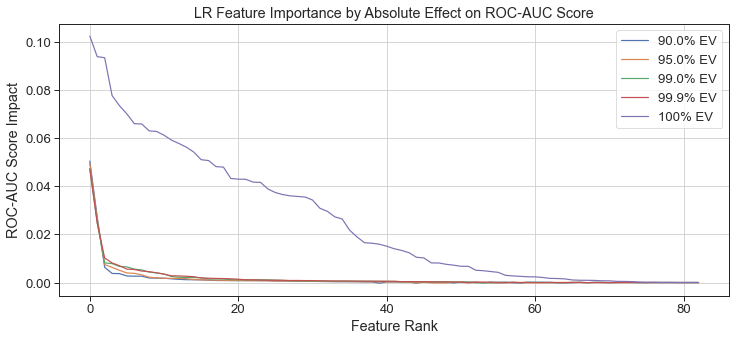

In [42]:
plt.figure(figsize=(12,5))
for i in [0.9, 0.95, 0.99, 0.999, None]:

    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", ConfounderPCA(cols=np.arange(2, X.shape[1]), n_components=i)),
        ("lr", LogisticRegression(max_iter=2000,)),
    ])
    clf.fit(X_train, y_train)
        
    if i != None:
        imp = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=int(i*5), scoring='roc_auc', n_jobs=-1)
        imp_df = pd.DataFrame(imp.importances_mean, columns=["Score"])
        imp_scores = imp_df.sort_values(by="Score", key=abs, ascending=False).to_numpy()
        sns.lineplot(x=np.arange(83), y=imp_scores.flatten(), label=f"{i*100}% EV") 
    else:
        imp = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42, scoring='roc_auc', n_jobs=-1)
        imp_df = pd.DataFrame(imp.importances_mean, columns=["Score"])
        imp_scores = imp_df.sort_values(by="Score", key=abs, ascending=False).to_numpy()
        sns.lineplot(x=np.arange(83), y=imp_scores.flatten(), label="100% EV") 

    plt.title("LR Feature Importance by Absolute Effect on ROC-AUC Score")
    plt.ylabel("ROC-AUC Score Impact")
    plt.xlabel("Feature Rank")
    
plt.show()